In [25]:
import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [26]:
count=0
dirs= os.listdir("Images/")
for dir in dirs:
    files= list(os.listdir("Images/"+dir))
    print(dir + " Folder has " + str(len(files)) + " Images")
    count=count+ len(files)
print("Images Folde has " + str(count) + " Images")


daisy Folder has 764 Images
dandelion Folder has 1052 Images
rose Folder has 784 Images
sunflower Folder has 733 Images
tulip Folder has 984 Images
Images Folde has 4317 Images


In [27]:
base_dir ="Images/"
img_size =180
batch=32

In [28]:
train_ds= tf.keras.utils.image_dataset_from_directory(base_dir, 
                                                       seed=123, 
                                                       validation_split=0.2, 
                                                       subset="training", 
                                                       batch_size=batch, 
                                                       image_size=(img_size,img_size))
val_ds = tf.keras.utils.image_dataset_from_directory(base_dir, 
                                                       seed=123, 
                                                       validation_split=0.2, 
                                                       subset="validation", 
                                                       batch_size=batch, 
                                                       image_size=(img_size,img_size))

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [29]:
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [30]:
import matplotlib.pyplot as plt

In [31]:
plt.figure(figsize=(14,14))
i=0
for images, labels in train_ds.take(1):
    for i in range (9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(flower_names[labels[i]])
        plt.axis("off")

In [32]:
AUTOTUNE = tf.data.AUTOTUNE

In [33]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [34]:
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [35]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size, img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

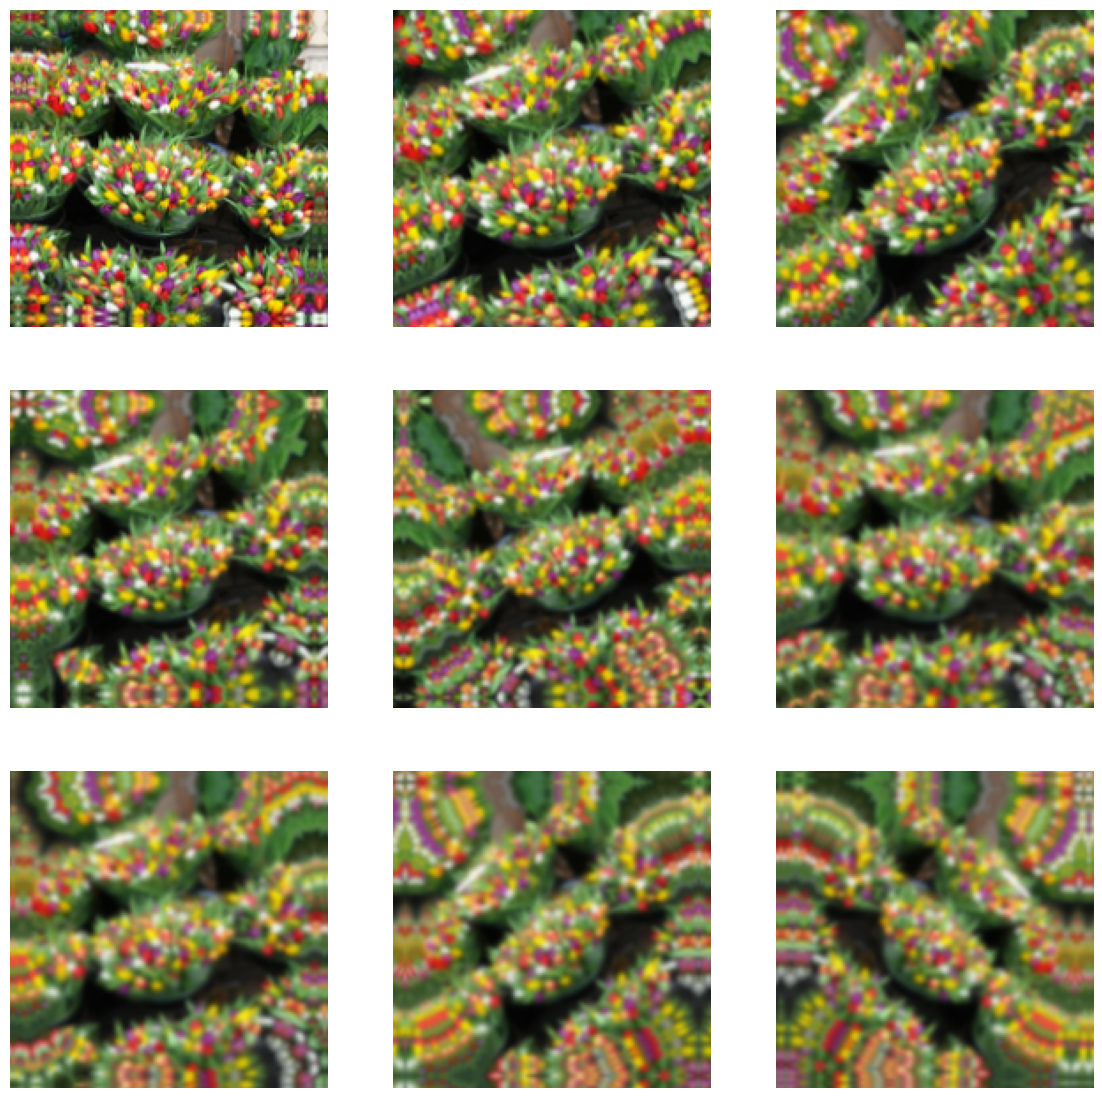

In [36]:
plt.figure(figsize=(14,14))
i=0
for images, labels in train_ds.take(1):
    for i in range (9):
        images= data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype("uint8"))
        plt.axis("off")

In [37]:
model= Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(32, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(64, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(5)])

In [38]:
model.compile(optimizer="adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [40]:
history=model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
108/108 [==============================] - 33s 293ms/step - loss: 1.3404 - accuracy: 0.4424 - val_loss: 1.0848 - val_accuracy: 0.5643
Epoch 2/15
108/108 [==============================] - 34s 310ms/step - loss: 1.0786 - accuracy: 0.5828 - val_loss: 1.0126 - val_accuracy: 0.5886
Epoch 3/15
108/108 [==============================] - 30s 277ms/step - loss: 0.9857 - accuracy: 0.6193 - val_loss: 0.9530 - val_accuracy: 0.6304
Epoch 4/15
108/108 [==============================] - 30s 281ms/step - loss: 0.9268 - accuracy: 0.6442 - val_loss: 0.8669 - val_accuracy: 0.6628
Epoch 5/15
108/108 [==============================] - 28s 258ms/step - loss: 0.8531 - accuracy: 0.6740 - val_loss: 0.8285 - val_accuracy: 0.6663
Epoch 6/15
108/108 [==============================] - 28s 256ms/step - loss: 0.8030 - accuracy: 0.6922 - val_loss: 0.8035 - val_accuracy: 0.6918
Epoch 7/15
108/108 [==============================] - 28s 263ms/step - loss: 0.7682 - accuracy: 0.7105 - val_loss: 0.7720 - val_ac

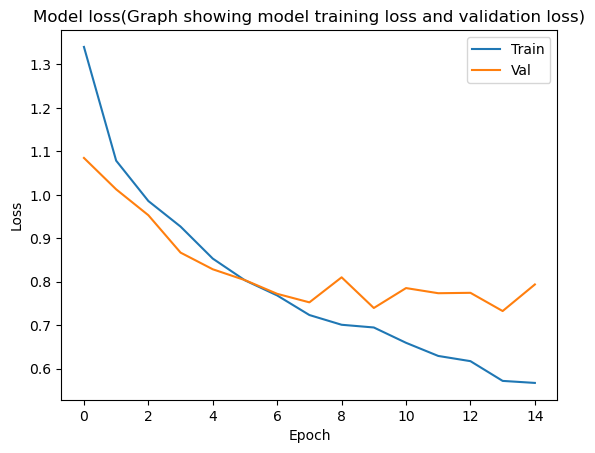

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss(Graph showing model training loss and validation loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

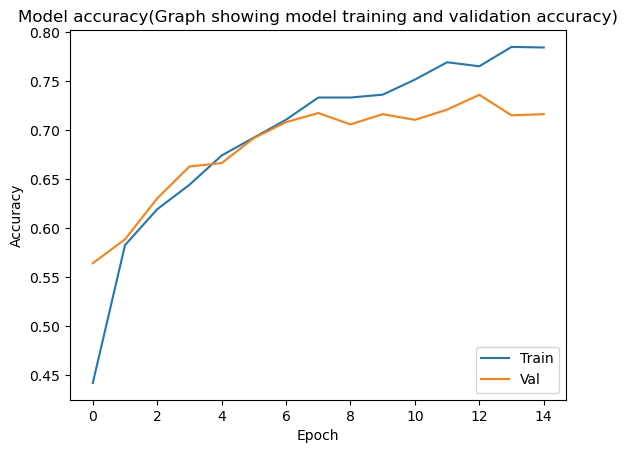

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy(Graph showing model training and validation accuracy)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [43]:
input_image=tf.keras.utils.load_img("Sample/rose_not.jpg", target_size=(180,180))
input_image_array=tf.keras.utils.img_to_array(input_image)
input_image_exp_dim = tf.expand_dims(input_image_array,0)

predictions= model.predict(input_image_exp_dim)
result=tf.nn.softmax(predictions[0])
flower_names[np.argmax(result)]


1/1 [==============================] - 0s 238ms/step


'sunflower'

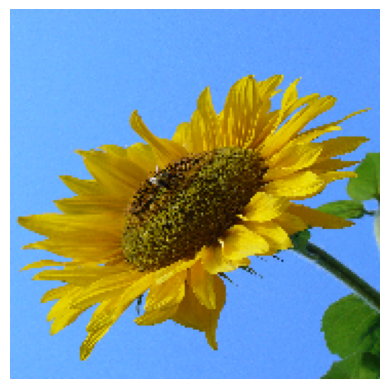

In [44]:
plt.imshow(input_image)
plt.axis('off')
plt.show()

In [45]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180, 180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array, 0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = "The Image belongs to " + flower_names[np.argmax(result)] + " with a score of " + str(np.max(result) * 100)
    return outcome

In [46]:
classify_images("Sample/sunflower.jpg")

1/1 [==============================] - 0s 31ms/step


'The Image belongs to dandelion with a score of 58.35469961166382'

In [47]:
model.save("Flower_Recognition_Model.h5")

In [48]:
import gradio as gr
import tensorflow as tf
import numpy as np

# Load the custom flower recognition model
model = tf.keras.models.load_model("Flower_Recognition_Model.h5")

# Define the labels
flower_names = ["daisy", "dandelion", "rose", "sunflower", "tulip"]

def classify_flower(image_path):
    # Load the image
    input_image = tf.keras.preprocessing.image.load_img(image_path, target_size=(180, 180))
    input_image_array = tf.keras.preprocessing.image.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array, 0)

    # Make predictions using the custom flower recognition model
    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    predicted_flower = flower_names[np.argmax(result)]
    confidence = np.max(result)
    
    return predicted_flower, confidence

# Create a Gradio interface
iface = gr.Interface(fn=classify_flower, inputs="file", outputs=["text", "number"], title="Flower Recognition")
iface.launch(inline=True)

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
